In [3]:
import numpy as np
import matplotlib.pyplot as plt

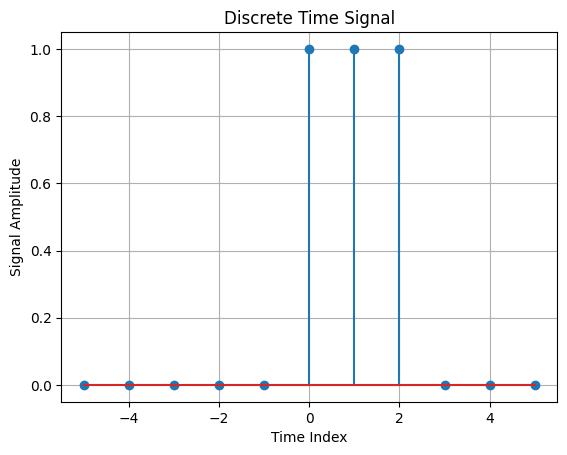

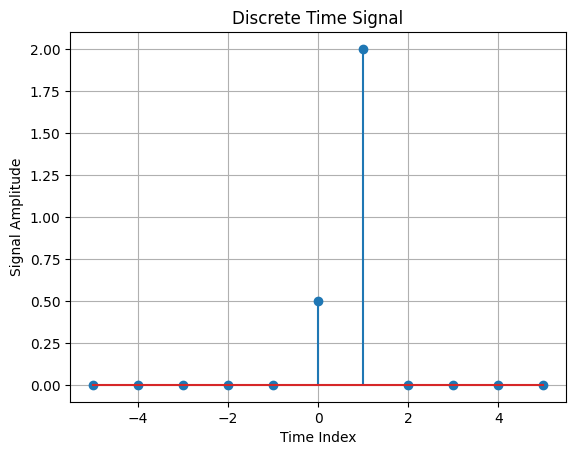

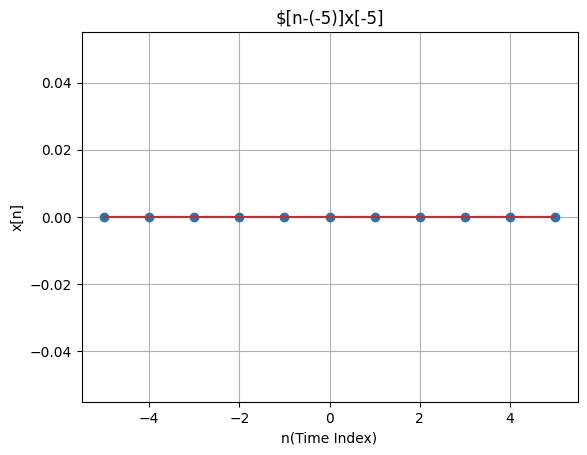

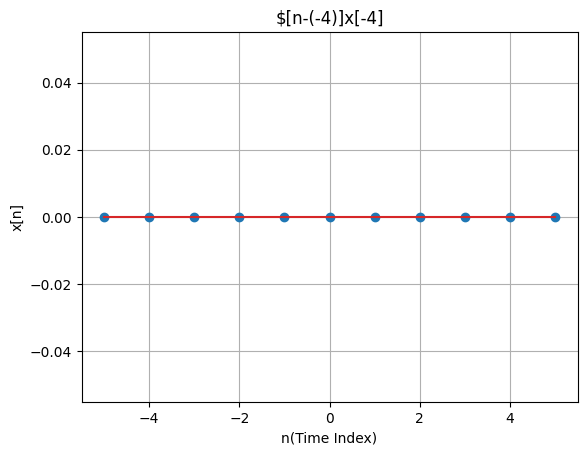

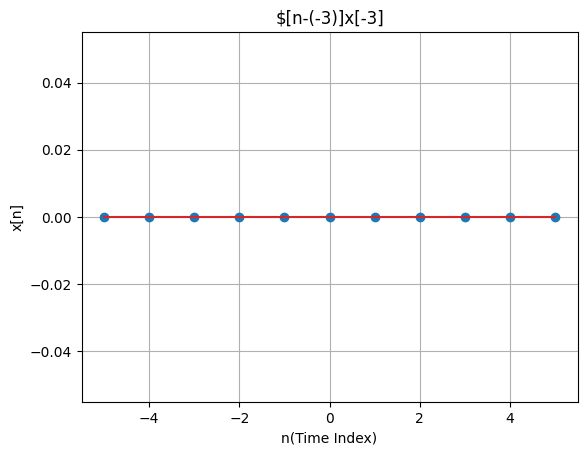

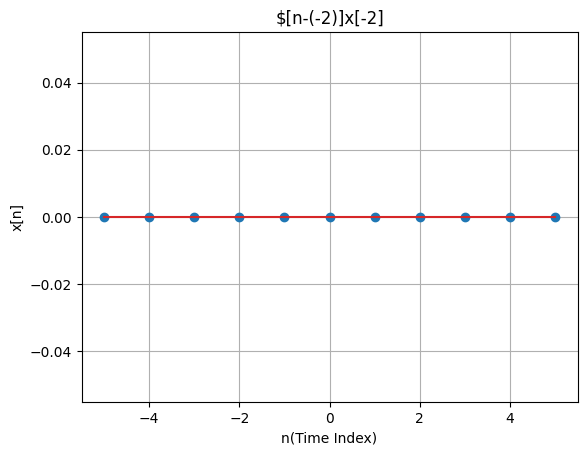

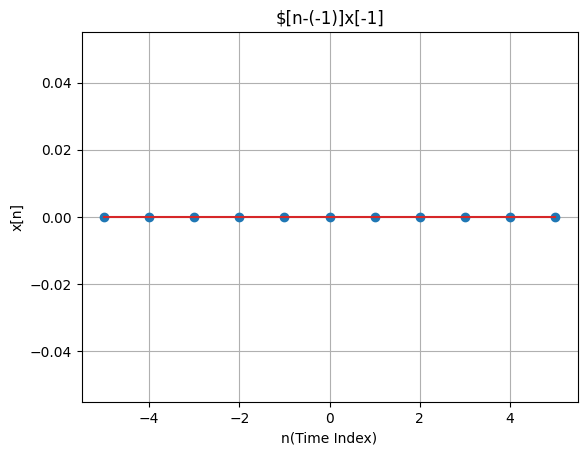

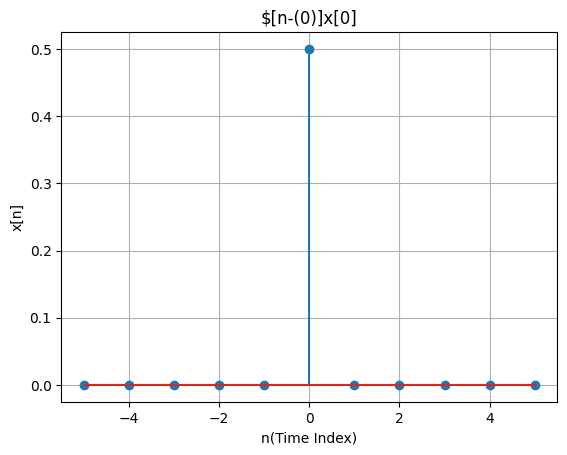

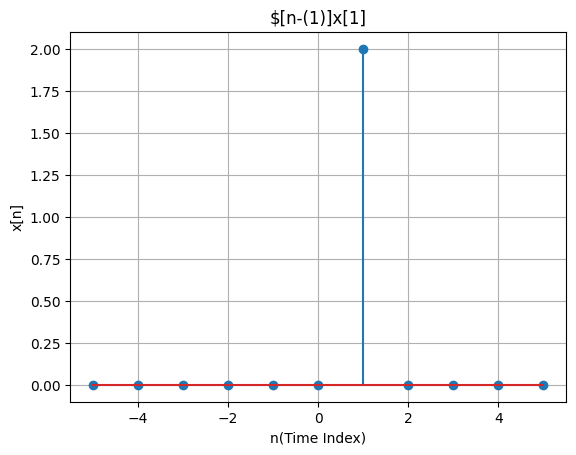

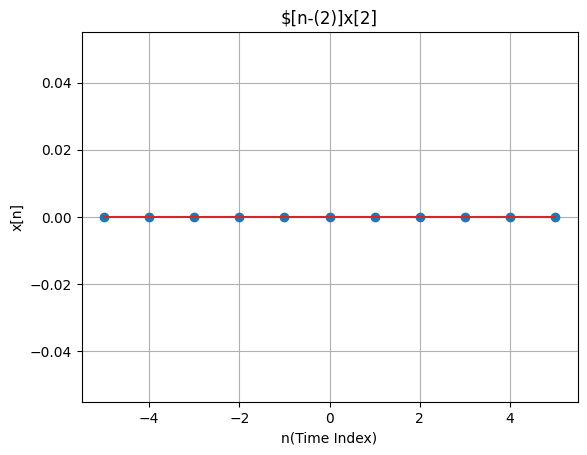

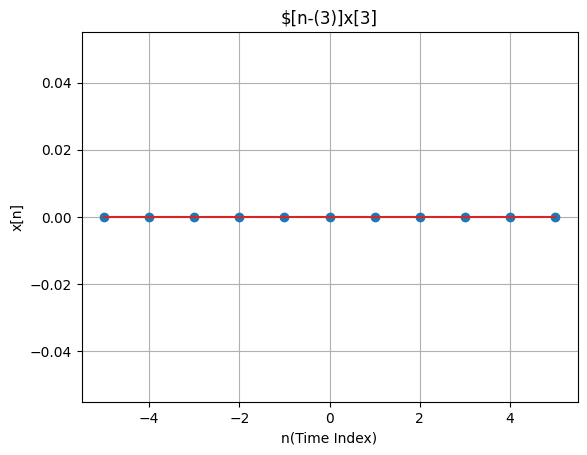

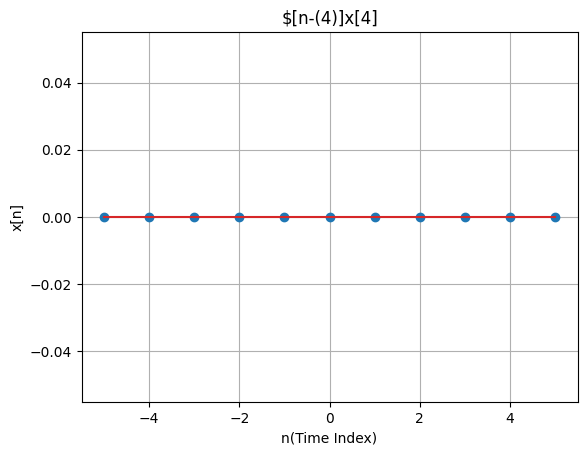

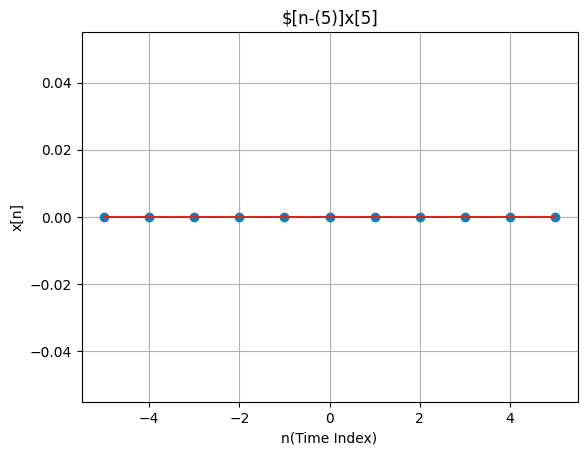

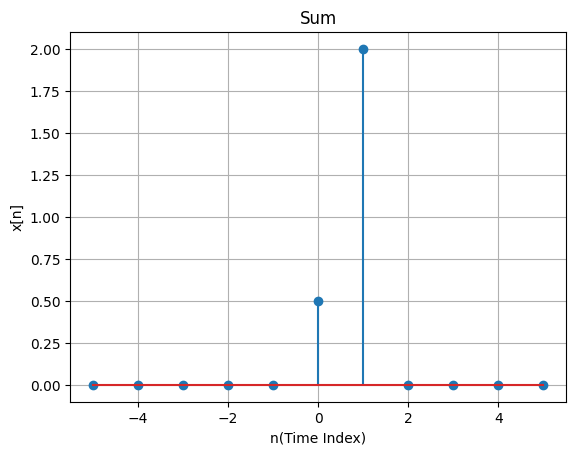

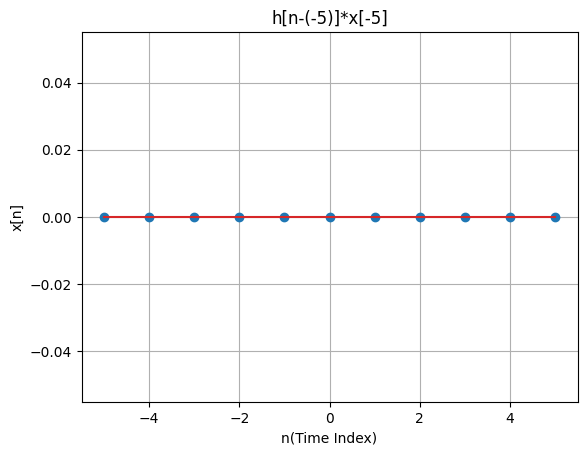

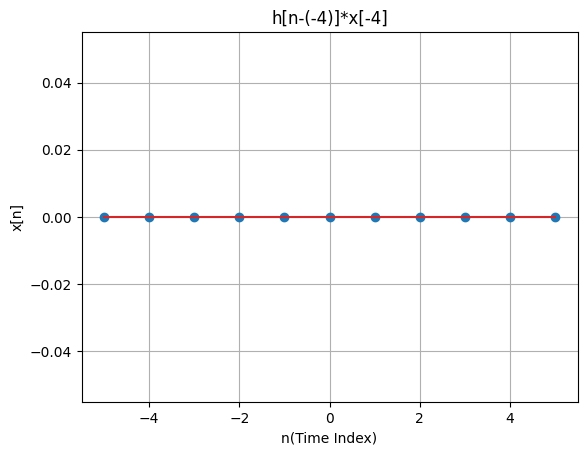

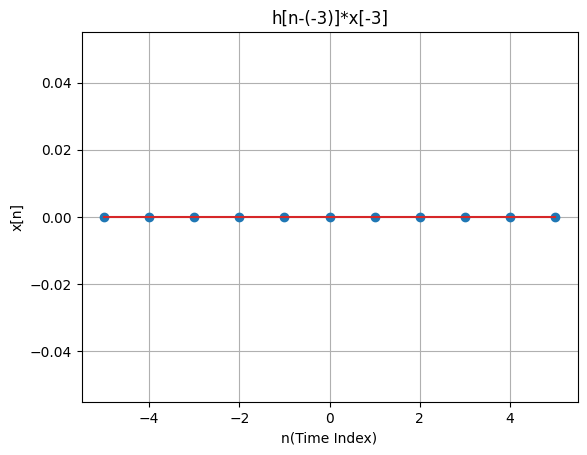

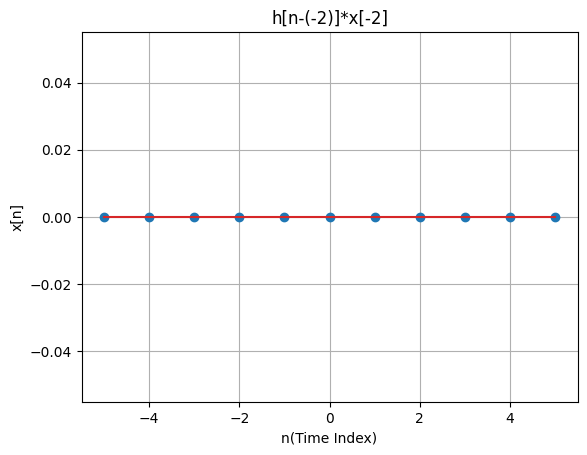

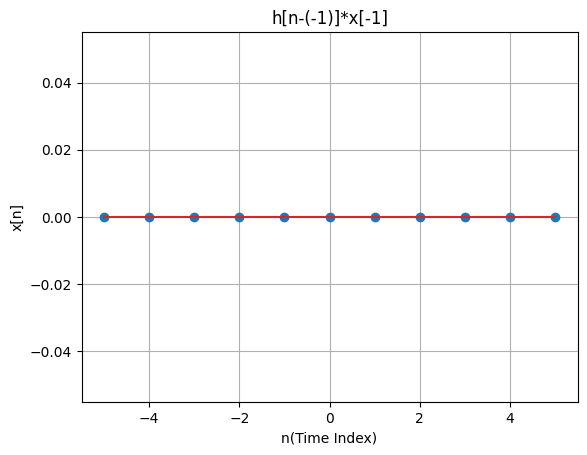

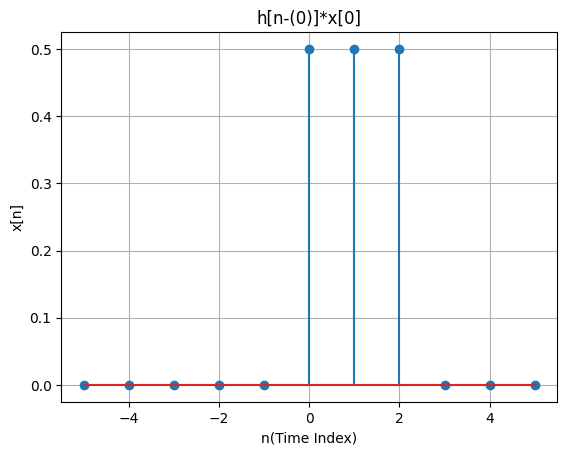

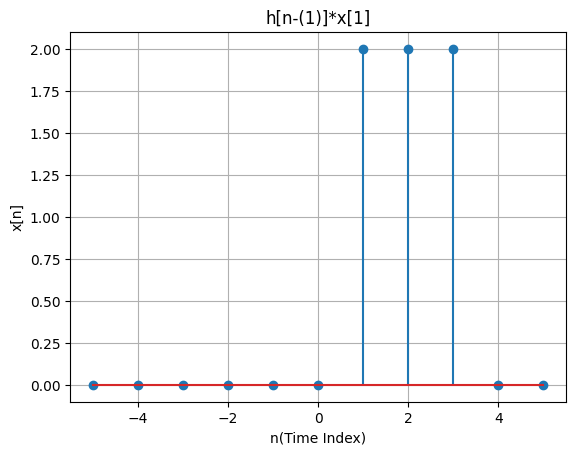

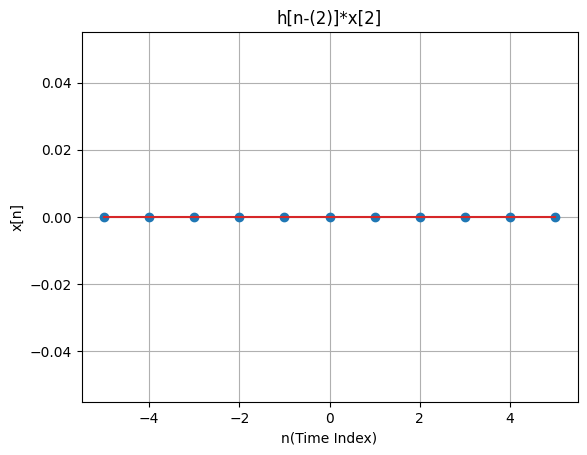

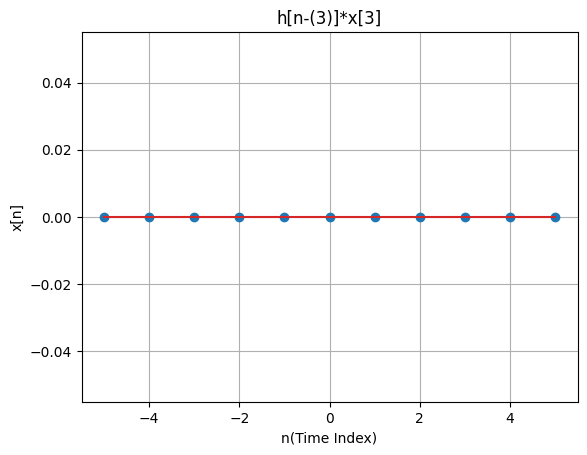

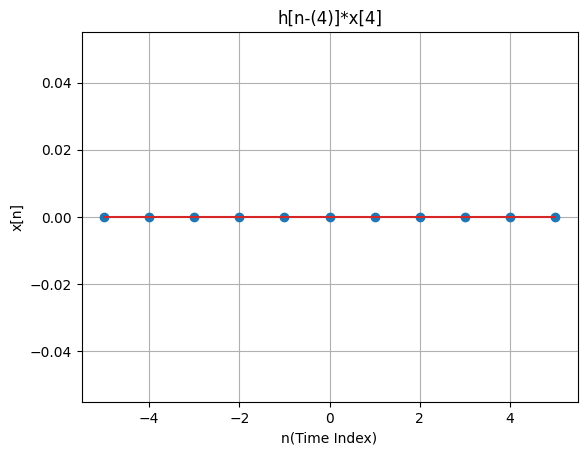

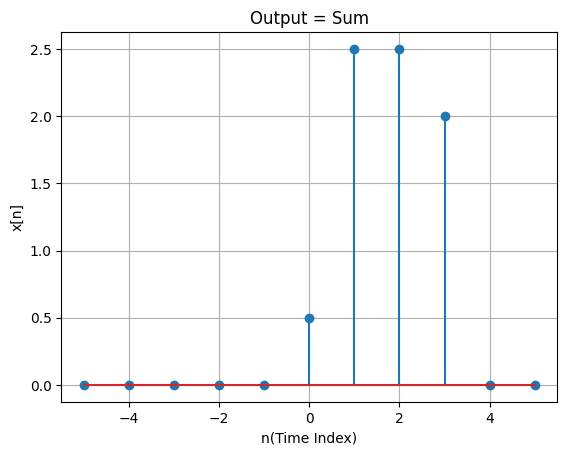

In [4]:
class DiscreteSignal:
    def __init__(self, INF):
        self.INF = INF
        self.values =  np.zeros(2*self.INF + 1)
        
    def set_value_at_time(self, time, value):
        index = time + self.INF
        if index > (2 * self.INF):
            raise ValueError("Time index is out of range.")
        self.values[index] = value;  
    
    def shift_signal(self, shift):
        shifted_signal  = DiscreteSignal(self.INF)
        
        if shift < 0:
            shifted_signal.values[-shift :] = self.values[0 : len(self.values) + shift]
        elif shift > 0:
            shifted_signal.values[0 : len(self.values) - shift ] = self.values[shift:]
        else:
            shifted_signal.values = self.values.copy();    
        return shifted_signal 
    
    def add(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Two Signals must have the same length to be added.")
        added_signal = DiscreteSignal(self.INF)
        added_signal.values = self.values + other.values
        return added_signal
    
    def multiply(self, other):
        if len(self.values) != len(other.values):
            raise ValueError("Two Signals must have the same length to be multiplied.")
        multiplied_signal = DiscreteSignal(self.INF)
        multiplied_signal.values = self.values * other.values
        return multiplied_signal  
    
    def multiply_const_factor(self, scaler):
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * scaler
        return new_signal
    
    def plot(self , xlabel='Time Index', ylabel='Signal Amplitude', title='Discrete Time Signal'):
        time_indices = np.arange(-self.INF , self.INF + 1)
        plt.stem(time_indices , self.values)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(True)
        plt.show()  

# if __name__ == '__main__':
#     signal1 = DiscreteSignal(INF = 5)
#     signal1.set_value_at_time(0,2)
#     signal1.set_value_at_time(1,3)
#     signal1.set_value_at_time(2,1)
#     signal1.plot()
#     signal2 = signal1.shift_signal(1)
#     signal2.plot()
    
#     signal3 = DiscreteSignal(INF = 5)
#     signal3 = signal1.add(signal2)
#     signal3.plot()
    
#     signal4 = DiscreteSignal(INF = 5)
#     signal4 = signal1.multiply(signal2)
#     signal4.plot()
    
#     signal5 = DiscreteSignal(INF = 5)
#     signal5 = signal1.multiply_const_factor(2)
#     signal5.plot()  

class LTI_Discrete:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response
        self.INF = impulse_response.INF
        self.values = impulse_response.values
        
    def linear_combination_of_impulses(self, input_signal):
        for i in range(len(input_signal.values)):
            signal = DiscreteSignal(self.INF)
            signal.values[i] = input_signal.values[i]
            signal.plot('n(Time Index)' , 'x[n]' , f"$[n-({i-self.INF})]x[{i-self.INF}]")
        input_signal.plot('n(Time Index)' , 'x[n]' , 'Sum')    
            
    def output(self, input_signal):
        
        sum_signal = DiscreteSignal(self.INF)
        
        for i in range(-self.INF, self.INF):
            shifted_impulse = DiscreteSignal(self.INF)
            shifted_impulse = self.impulse_response.shift_signal(-i)
            signal = DiscreteSignal(self.INF)
            signal = shifted_impulse.multiply_const_factor(input_signal.values[i+ self.INF])
            sum_signal = sum_signal.add(signal)
            signal.plot('n(Time Index)' , 'x[n]' , f"h[n-({i})]*x[{i}]")
                
        sum_signal.plot('n(Time Index)' , 'x[n]' , 'Output = Sum')
        
    def plot(self , xlabel='Time Index', ylabel='Signal Amplitude', title='Discrete Time Signal'):
        time_indices = np.arange(-self.INF , self.INF + 1)
        plt.stem(time_indices , self.values)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(True)
        plt.show()
    
if __name__ == '__main__':
    
    impulse_response = DiscreteSignal(INF = 5)
    impulse_response.set_value_at_time(0,1)
    impulse_response.set_value_at_time(1,1)
    impulse_response.set_value_at_time(2,1)
    
    impulse_response.plot()
    
    input_signal = DiscreteSignal(INF = 5)
    input_signal.set_value_at_time(0,0.5)
    input_signal.set_value_at_time(1,2)
    input_signal.plot()
        
    LTI_Discrete_obj = LTI_Discrete(impulse_response)
    LTI_Discrete_obj.linear_combination_of_impulses(input_signal)
    LTI_Discrete_obj.output(input_signal)
    

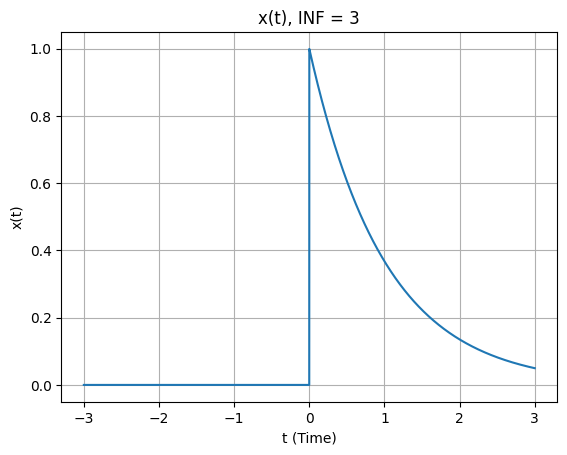

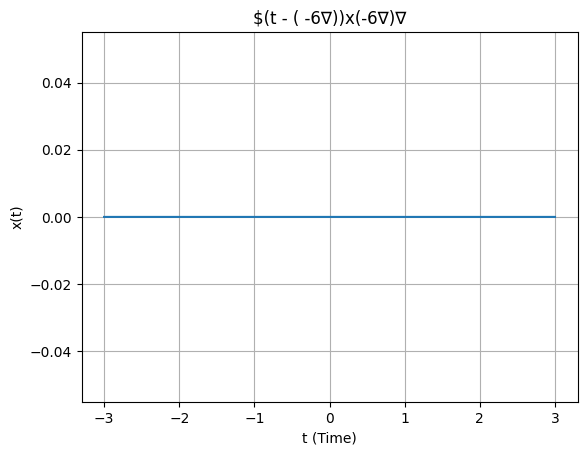

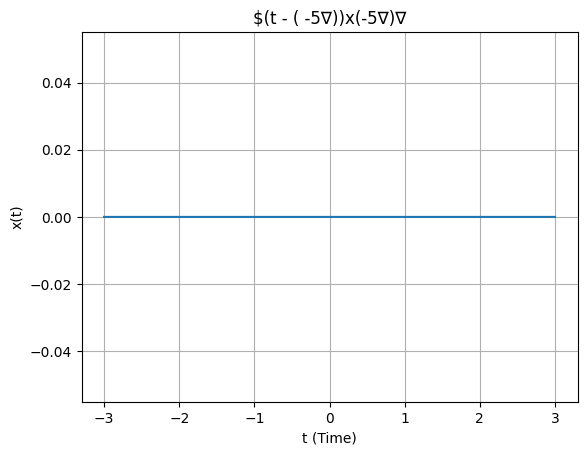

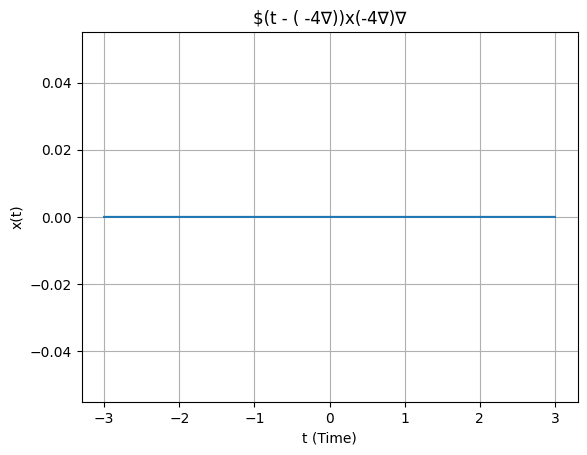

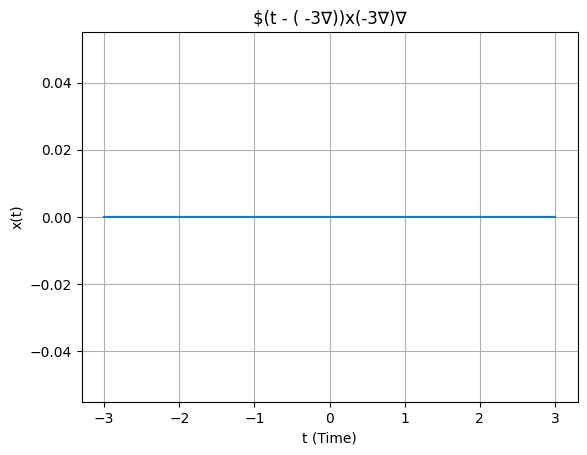

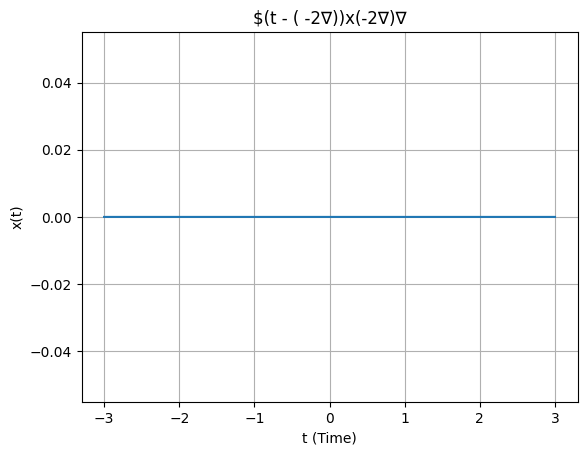

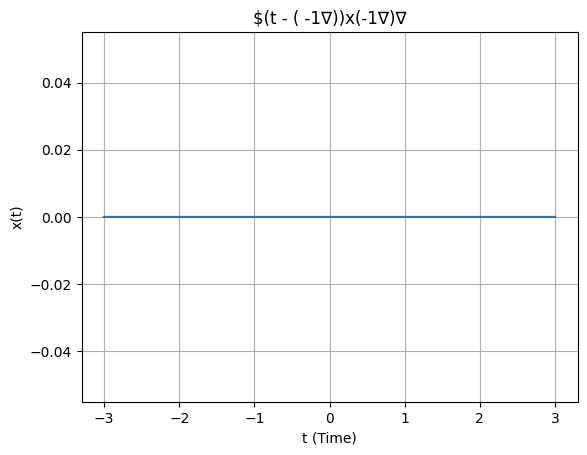

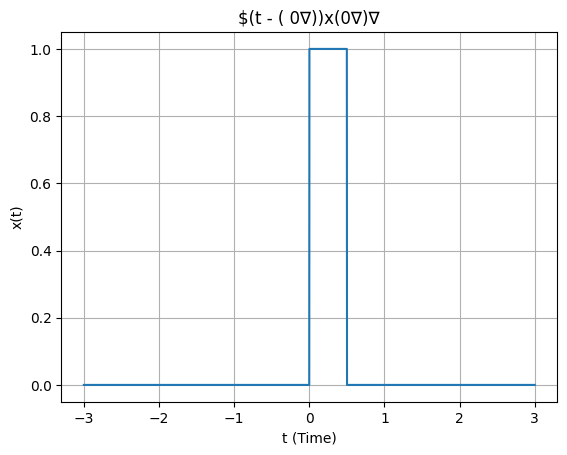

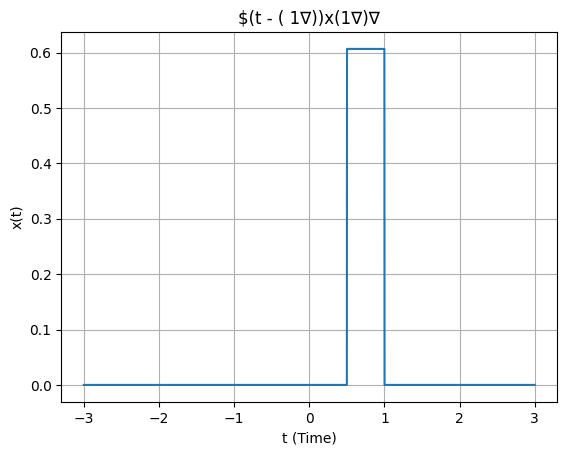

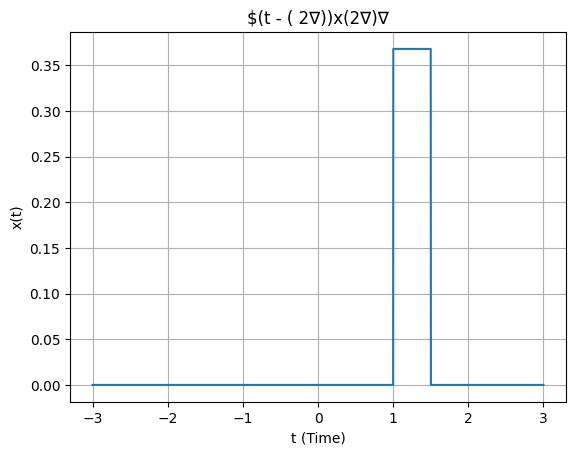

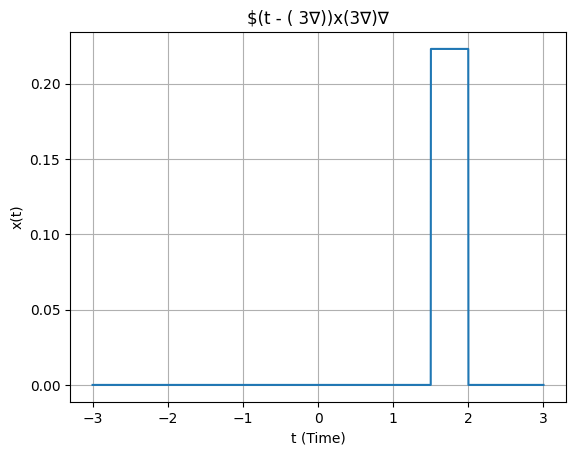

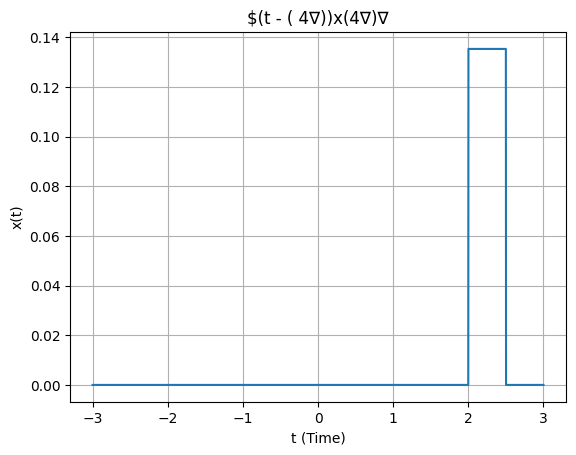

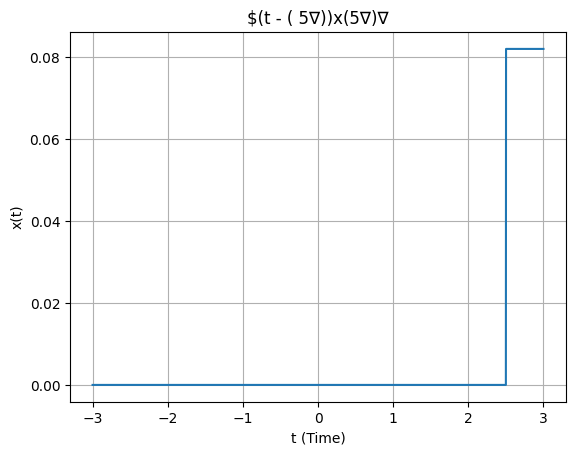

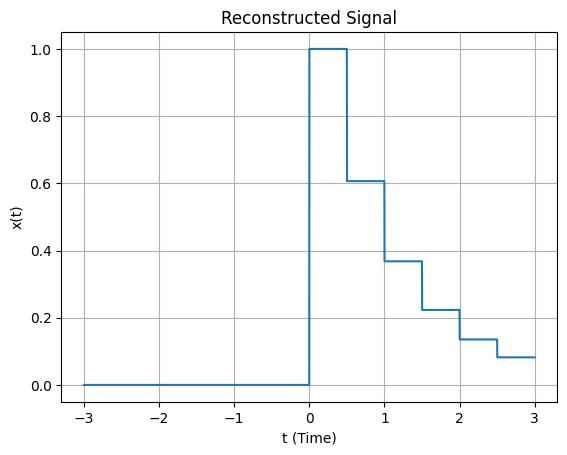

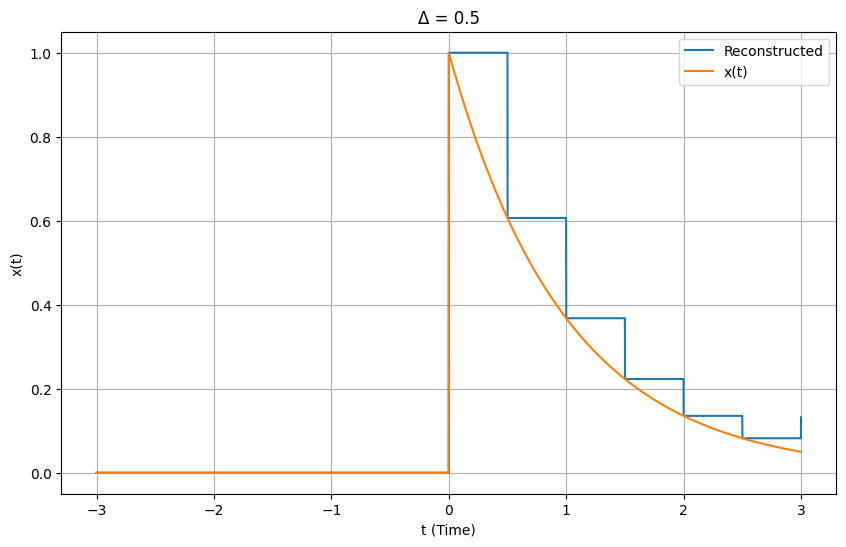

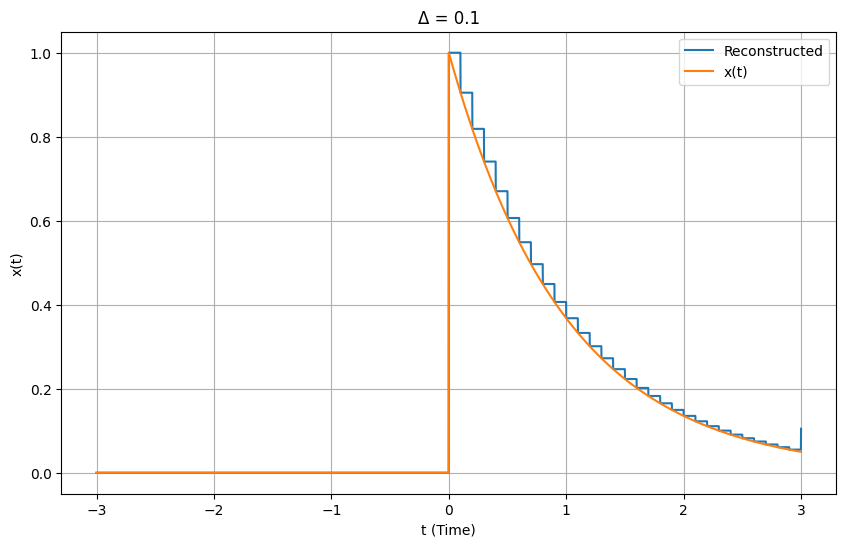

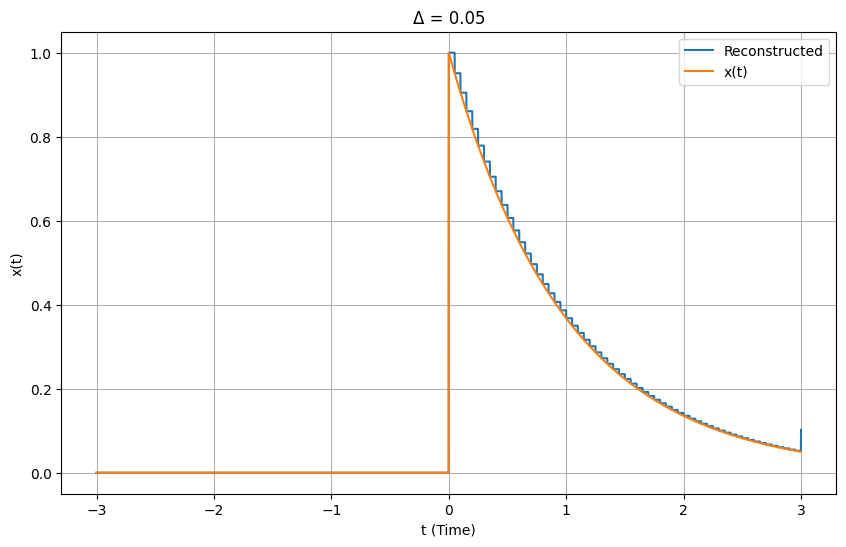

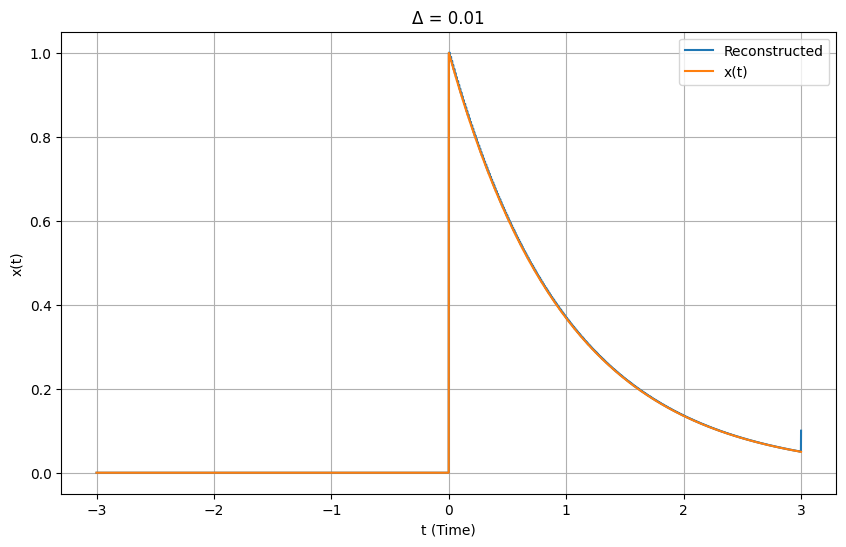

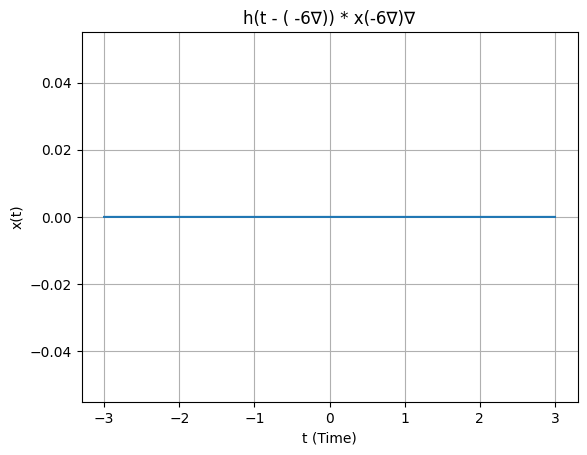

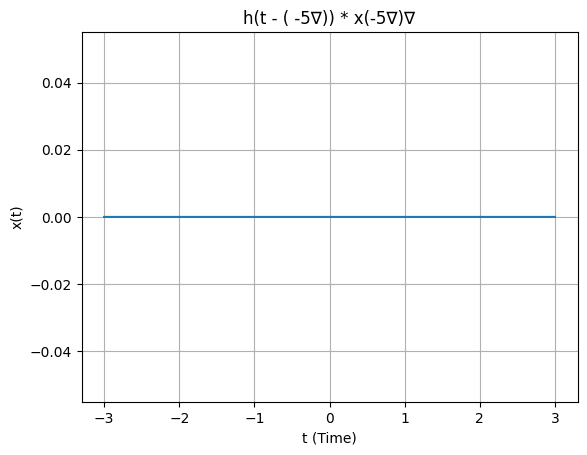

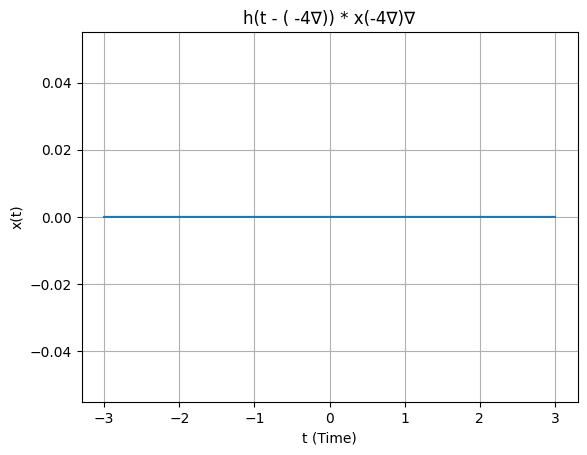

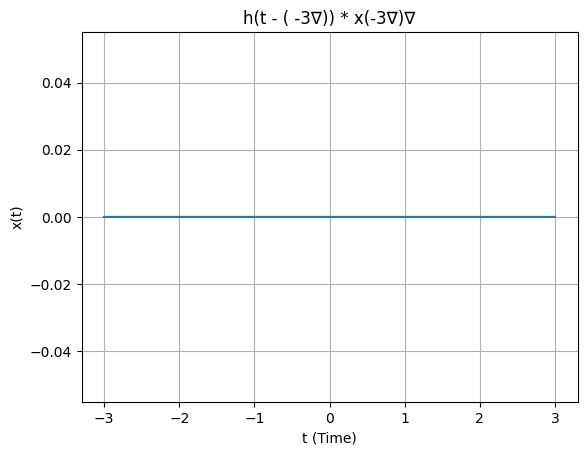

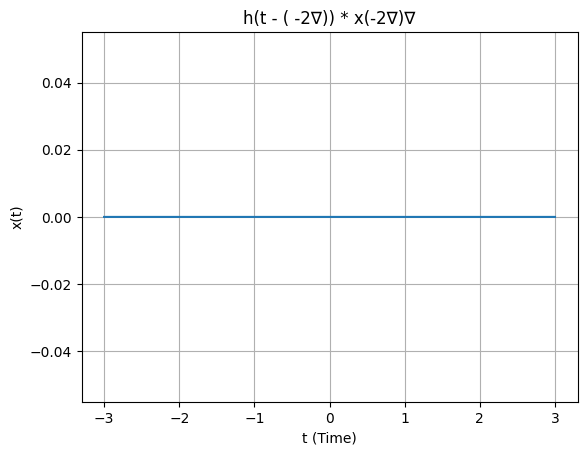

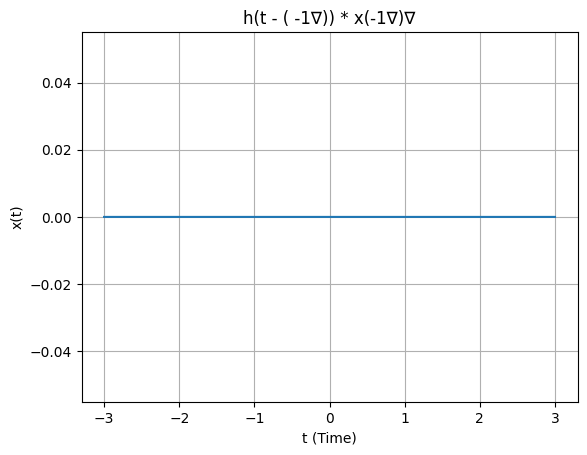

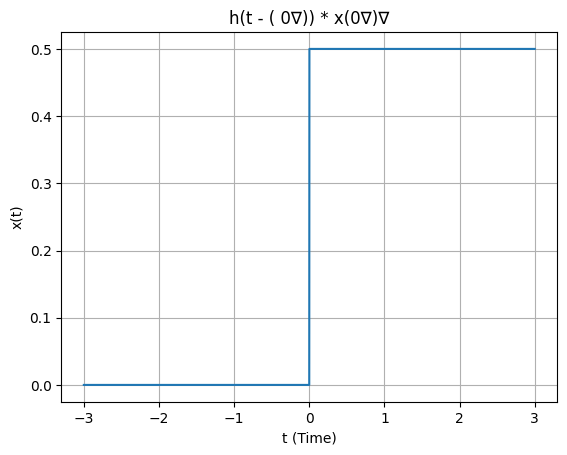

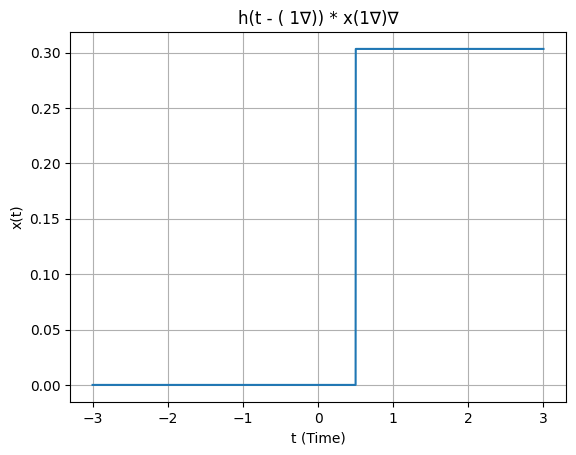

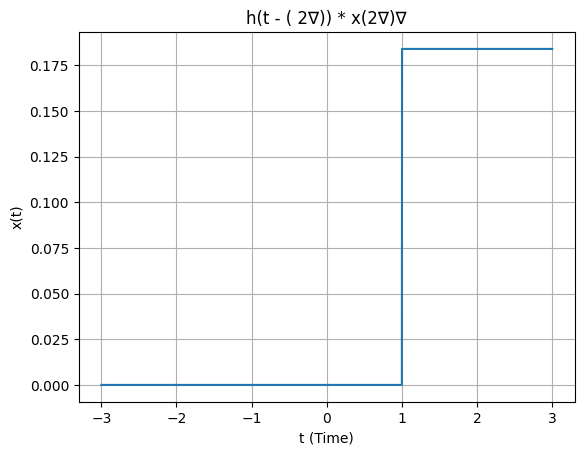

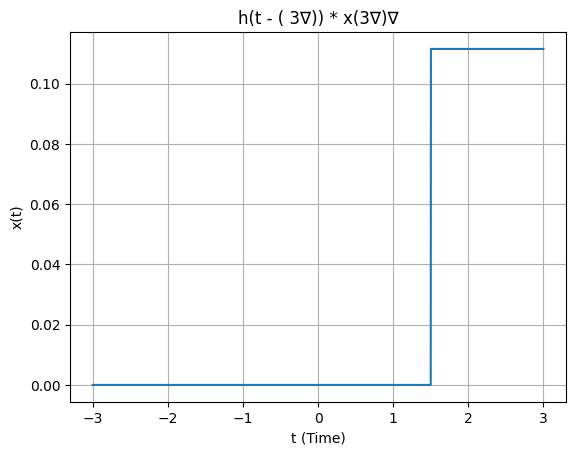

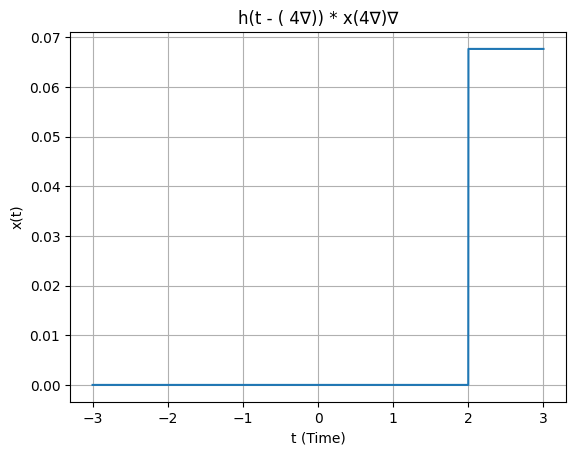

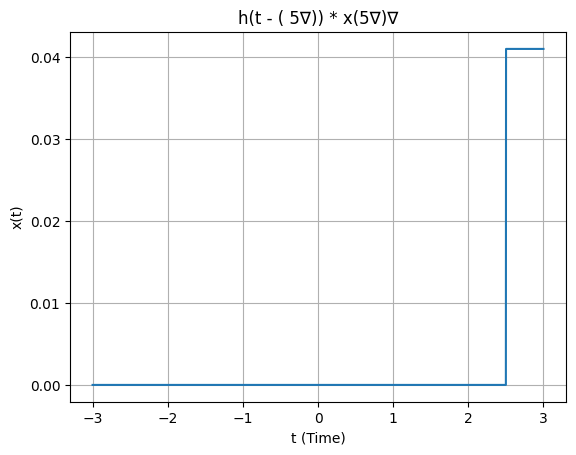

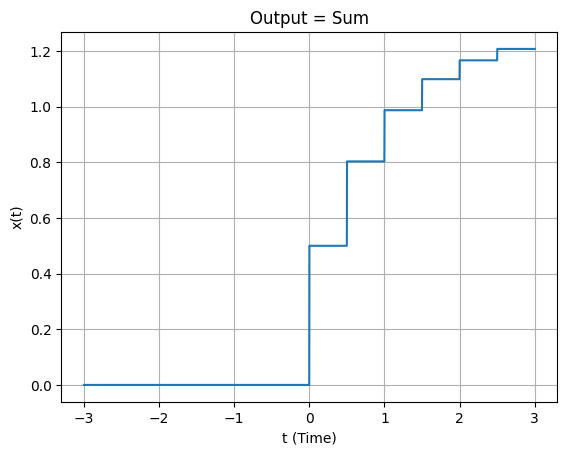

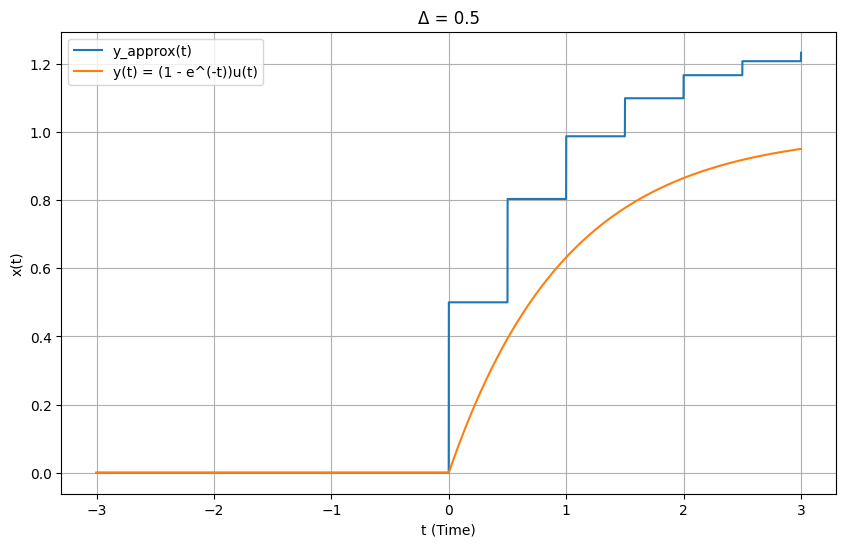

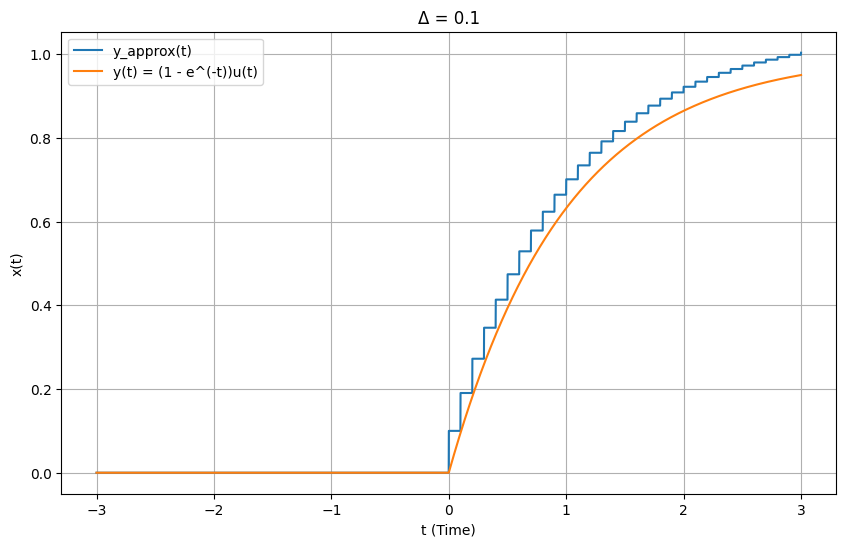

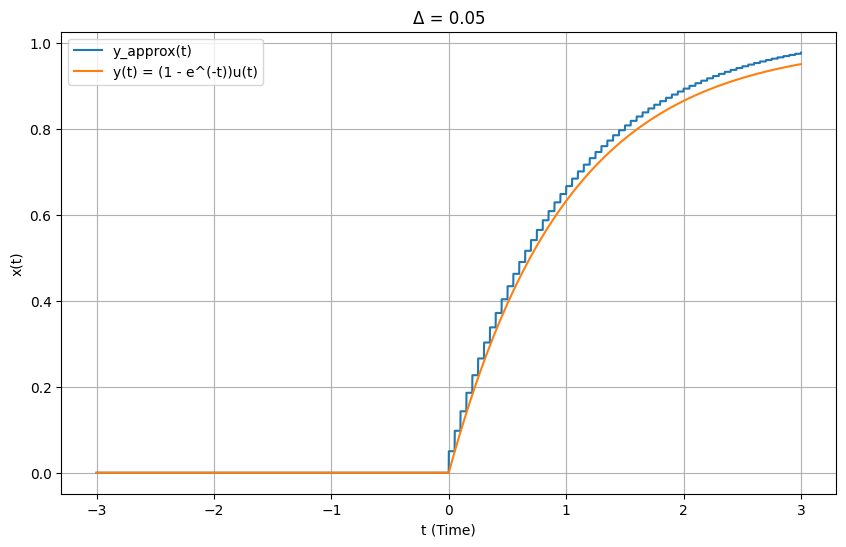

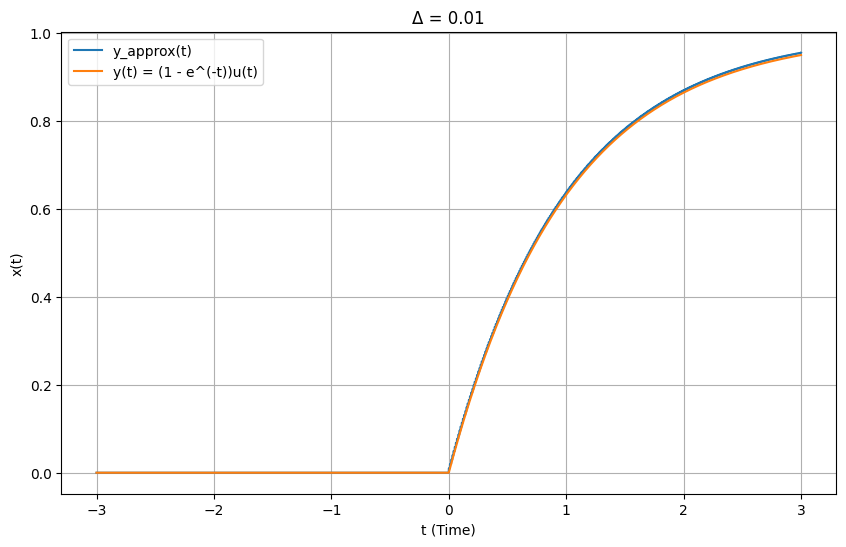

In [5]:
class ContinuousSignal:
    def __init__(self, func):
        self.func = func  
    
    def shift(self, shift):
        def shifted_func(t):
            return self.func(t-shift)
        return ContinuousSignal(shifted_func)            
    
    def add(self, other):
        def added_func(t):
            return self.func(t) + other.func(t)
        return ContinuousSignal(added_func)
    
    def multiply(self, other):
        def multiplied_func(t):
            return self.func(t) * other.func(t)
        return ContinuousSignal(multiplied_func) 
    
    def multiply_const_factor(self, scaler):
        def multiplied_const_func(t):
            return self.func(t) * scaler
        return ContinuousSignal(multiplied_const_func)
    
    def plot(self , startTimeIdx , endTimeIdx , num_of_points = 5000 , xlabel='Time/t', ylabel='Func Graph', title='Continuous Time Signal'):
        
        time = np.linspace(startTimeIdx , endTimeIdx , num_of_points)
        
        plt.plot(time , self.func(time))
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(True)
        plt.show()
        
class LTI_Continuous:
    def __init__(self, impulse_response):
        self.impulse_response = impulse_response
        
    def linear_combination_of_impulses(self, input_signal , delta):
        
        sum_signal = ContinuousSignal(lambda t: 0)
        
        for i in range(-6,6):
            t_i = i * delta
            shifted_impulse = self.impulse_response.shift(t_i)
            
            # Sample the input signal at t_i
            input_sample = input_signal.func(t_i)
            
            signal = shifted_impulse.multiply_const_factor(input_sample * delta)
            
            sum_signal = sum_signal.add(signal)
            
            signal.plot(-3, 3, 5000, 't (Time)', 'x(t)', f"$(t - ( {i}∇))x({i}∇)∇" )
            
        sum_signal.plot(-3,3,5000, 't (Time)' , 'x(t)' , 'Reconstructed Signal')
        
    def linear_combination_of_impulses_sum(self, input_signal , delta):
        
        sum_signal = ContinuousSignal(lambda t: 0)
        
        for i in range(-6,500):
            t_i = i * delta
            shifted_impulse = self.impulse_response.shift(t_i)
            
            # Sample the input signal at t_i
            input_sample = input_signal.func(t_i)
            
            signal = shifted_impulse.multiply_const_factor(input_sample * delta)
            
            sum_signal = sum_signal.add(signal)
            
        # sum_signal.plot(-3,3,5000, 't (Time)' , 'x(t)' , 'Reconstructed Signal')    
        time = np.linspace(-3, 3, 5000)    
        plt.figure(figsize=(10, 6))
        plt.plot(time, sum_signal.func(time), label='Reconstructed')
        plt.plot(time, input_signal.func(time), label='x(t)')
        
        plt.xlabel('t (Time)')
        plt.ylabel('x(t)')
        plt.title(f'Δ = {delta}')
        plt.legend()
        plt.grid(True)
        plt.show()    
        
    
    def output_approx(self, input_signal, delta):
        sum_signal = ContinuousSignal(lambda t: 0)
        
        for i in range(-6,6):
            
            t_i = i * delta
            shifted_impulse = self.impulse_response.shift(t_i)
            
            # Sample the input signal at t_i
            input_sample = input_signal.func(t_i)
            
            signal = shifted_impulse.multiply_const_factor(input_sample * delta)
            signal.plot(-3, 3, 5000, 't (Time)', 'x(t)', f"h(t - ( {i}∇)) * x({i}∇)∇" )
            
            sum_signal = sum_signal.add(signal)
                
        sum_signal.plot(-3,3,5000, 't (Time)' , 'x(t)' , 'Output = Sum')
    
    def output_approx_sum(self, input_signal, delta):
        sum_signal = ContinuousSignal(lambda t: 0)    
                
        for i in range(-6,1000):        
            
            t_i = i * delta
            shifted_impulse = self.impulse_response.shift(t_i)
            
            # Sample the input signal at t_i
            input_sample = input_signal.func(t_i)
            
            signal = shifted_impulse.multiply_const_factor(input_sample * delta)
            
            sum_signal = sum_signal.add(signal)
                
        # sum_signal.plot(-3,3,5000, 't (Time)' , 'x(t)' , '∇ = {delta}')
        time = np.linspace(-3, 3, 5000)    
        plt.figure(figsize=(10, 6))
        y_t = (1 - np.exp(-time)) * np.where(time >= 0, 1, 0)
        
        plt.plot(time, sum_signal.func(time), label='y_approx(t)')
        plt.plot(time, y_t, label='y(t) = (1 - e^(-t))u(t)')
        
        plt.xlabel('t (Time)')
        plt.ylabel('x(t)')
        plt.title(f'Δ = {delta}')
        plt.legend()
        plt.grid(True)
        plt.show() 
        
if __name__ == '__main__':
    
    # input function
    def signal_function(t):
        return np.where(t >= 0 , np.exp(-t) , 0)        
    
    input_signal = ContinuousSignal(signal_function)
    input_signal.plot(-3, 3, 5000, 't (Time)', 'x(t)', 'x(t), INF = 3')
    
    delta = 0.5
    
    # unit impluse function
    def signal_function2(t):
        return np.where((t >= 0) & (t<= delta), 1/delta , 0) 
    
    def unit_step_function(t):
        return np.where(t >= 0 , 1 , 0)
    
    def impulse_response(t):
        return np.where(t >= 0 , np.exp(-t) , 0)
    
    LTI_Continuous_obj = LTI_Continuous(ContinuousSignal(signal_function2))
    LTI_Continuous_obj.linear_combination_of_impulses(input_signal , delta)
    
    delta = 0.5
    LTI_Continuous_obj.linear_combination_of_impulses_sum(input_signal , delta)
    delta = 0.1
    LTI_Continuous_obj.linear_combination_of_impulses_sum(input_signal , delta)
    delta = 0.05
    LTI_Continuous_obj.linear_combination_of_impulses_sum(input_signal , delta)
    delta = 0.01
    LTI_Continuous_obj.linear_combination_of_impulses_sum(input_signal , delta)
    
    delta = 0.5
    LTI_Continuous_obj2 = LTI_Continuous(ContinuousSignal(unit_step_function))
    LTI_Continuous_obj2.output_approx(input_signal, delta)
    
    delta = 0.5
    LTI_Continuous_obj2.output_approx_sum(input_signal, delta)
    delta = 0.1
    LTI_Continuous_obj2.output_approx_sum(input_signal, delta)
    delta = 0.05
    LTI_Continuous_obj2.output_approx_sum(input_signal, delta)
    delta = 0.01
    LTI_Continuous_obj2.output_approx_sum(input_signal, delta)


In [ ]:
def main():
    
    